In [2]:
%matplotlib widget

In [5]:
import numpy as np
import pygimli as pg
import empymod as ep
from scipy.constants import mu_0
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import sys
sys.path.insert(1, '../src')

from FDEM1D import FDEM1D, FDEM1DModelling, LCModelling
from showStitched import showStitchedModels
from Plots import Plot_Datas

In [6]:
# First step: check configuration of FDEM to perform forward
# Second step: check number of layers in FDEM1D Modelling forward class

In [19]:
def grid(model, depthmax=10, ny=101, nlay=2):
    """ Generates a grid from the model to plot a 2D section
    
    I CAN IMPROVE THIS  """
    # Arrays for plotting
    npos = np.shape(model)[0] # number of 1D models
   # ny = 101 # size of the grid in y direction
    y = np.linspace(0, depthmax, ny) # y axis [m]
    grid = np.zeros((npos, ny)) # empty grid
    thk = model[:,:nlay-1].copy() # define electrical conductivities
    sig = model[:,nlay-1:].copy()  # define thicknesses
    
    # Fill the grid with the conductivity values
    
    if nlay == 3:
        for i in range(npos):
            y1 = 0
            # First layer
            while y[y1] < thk[i,0]:
                grid[i, y1] = sig[i, 0]
                y1 += 1
                #y2 = y1
            # Second layer
            while y[y1] < (thk[i,0] + thk[i,1]):
                grid[i, y1] = sig[i, 1]
                y1 += 1
            # Third layer
            grid[i, y1:] = sig[i, 2]
    
    if nlay == 2:   
        for i in range(npos):
            y1 = 0
            # First layer
            while y[y1] < thk[i,0]:
                grid[i, y1] = sig[i, 0]
                y1 += 1
                if y1 > ny-1:
                    break
            while y[y1] >= thk[i,0]:
                grid[i, y1] = sig[i, 1]
                y1 += 1
                if y1 > ny-1:
                    break
        
    return grid

In [40]:
## Create a test model

pos = 40
nLayers = 2

x =  np.linspace(0,pos,pos, endpoint=False)
sigm_1 = 20/1000
sigm_2 = 1200/1000
#sigm_3 = 100/1000
#sigm_4 = 25/1000
thk_1 = 4* np.ones(pos) #- (x/100)  # - [0.5, 0.6, 0.7, .8, .9, 1, 0.9, 0.8, 0.7, 0.6]
thk_1[9:] = 4* np.ones(pos-9) - (5*x[:31]/100) 
thk_1[30:] = thk_1[30]
#thk_2 = 3*np.ones(pos)   #+ 2*np.array([0.5, 0.6, 0.7, .8, .9, 1, 0.9, 0.8, 0.7, 0.6])
#thk_3 = np.ones_like(x)*2

models = np.zeros((pos, nLayers*2-1))
models[:,0] = thk_1
#models[:,1] = thk_2
#models[:,2] = thk_3
models[:,1] = sigm_1
models[:,2] = sigm_2
#models[:,3] = sigm_2
#models[:,4] = sigm_3
#models[:,6] = sigm_4

nSoundings = pos

## Create test data

data_1D = []

# 2 lay case
for p in range(pos):
    data_1D.append(FDEM1D(models[p,1:], models[p,:1]))

# 4 lay case
#for p in range(pos):
#    data_t.append(FDEM1D(models[p,3:], models[p,:3]))



In [41]:
#np.save('models/model1D_slope1_40pos', models)
#np.save('data/data1D_slope1_40pos', data_1D)
#models = np.load('models/model1D_slope10_40pos.npy')
#data_1D = np.load('data/data1D_slope10_40pos.npy')

In [42]:
#np.save('dataLCI', data_t)
#data_3D = np.load('data/data_3D_slope10_40pos_sorted.npy', allow_pickle=True)
#data_3D = np.array(data_3D)

In [43]:
#data_t = np.array(data_t)

In [44]:
np.shape(data_1D)

(40, 18)

In [45]:
data_1D = np.array(data_1D)

In [46]:
np.shape(data_3D)

NameError: name 'data_3D' is not defined

In [47]:
def Plot2Datas(data_1D, data_3D):

    fig, ax = plt.subplots(3,4, sharex = True, sharey = True)

    ax[0,0].semilogy(data_1D[:,0], '.b', label='H2 Q')
    ax[0,0].semilogy(data_3D[:,0], 'xb' )
    ax[0,0].semilogy(data_1D[:,1], '.k', label = 'H4 Q')
    ax[0,0].semilogy(data_3D[:,1], 'xk')
    ax[0,0].semilogy(data_1D[:,2], '.r', label= 'H8 Q')
    ax[0,0].semilogy(data_3D[:,2], 'xr' )
    ax[0,0].legend(fontsize=7)

    ax[0,1].semilogy(100*np.abs((data_1D[:,0]-data_3D[:,0])/data_3D[:,0]), ':b', label='H2 Q')
    ax[0,1].semilogy(100*np.abs((data_1D[:,1]-data_3D[:,1])/data_3D[:,1]), ':k', label='H4 Q')
    ax[0,1].semilogy(100*np.abs((data_1D[:,2]-data_3D[:,2])/data_3D[:,2]), ':r', label='H8 Q')
    ax[0,1].legend(fontsize=7)

    ax[1,0].semilogy(data_1D[:,3], '.b', label='P2 Q')
    ax[1,0].semilogy(data_3D[:,3], 'xb' )
    ax[1,0].semilogy(data_1D[:,4], '.k', label = 'P4 Q')
    ax[1,0].semilogy(data_3D[:,4], 'xk' )
    ax[1,0].semilogy(data_1D[:,5], '.r', label= 'P8 Q')
    ax[1,0].semilogy(data_3D[:,5], 'xr')
    ax[1,0].legend(fontsize=7)

    ax[1,1].semilogy(100*np.abs((data_1D[:,3]-data_3D[:,3])/data_3D[:,3]), 'b:', label='P2 Q')
    ax[1,1].semilogy(100*np.abs((data_1D[:,4]-data_3D[:,4])/data_3D[:,4]), ':k', label='P4 Q')
    ax[1,1].semilogy(100*np.abs((data_1D[:,5]-data_3D[:,5])/data_3D[:,5]), ':r', label='P8 Q')
    ax[1,1].legend(fontsize=7)

    ax[2,0].semilogy(data_1D[:,6], '.b', label='V2 Q')
    ax[2,0].semilogy(data_3D[:,6], 'xb' )
    ax[2,0].semilogy(data_1D[:,7], '.k', label = 'V4 Q')
    ax[2,0].semilogy(data_3D[:,7], 'xk')
    ax[2,0].semilogy(data_1D[:,8], '.r', label= 'V8 Q')
    ax[2,0].semilogy(data_3D[:,8], 'xr' )
    ax[2,0].legend(fontsize=7)

    ax[2,1].semilogy(100*np.abs((data_1D[:,6]-data_3D[:,6])/data_3D[:,6]), ':b', label='V2 Q')
    ax[2,1].semilogy(100*np.abs((data_1D[:,7]-data_3D[:,7])/data_3D[:,7]), ':k', label='V4 Q')
    ax[2,1].semilogy(100*np.abs((data_1D[:,8]-data_3D[:,8])/data_3D[:,8]), ':r', label='V8 Q')
    ax[2,1].legend(fontsize=7)

    ax[0,2].semilogy(data_1D[:,9], '.b', label='H2 IP')
    ax[0,2].semilogy(data_3D[:,9], 'xb' )
    ax[0,2].semilogy(data_1D[:,10], '.k', label = 'H4 IP')
    ax[0,2].semilogy(data_3D[:,10], 'xk' )
    ax[0,2].semilogy(data_1D[:,11], '.r', label= 'H8 IP')
    ax[0,2].semilogy(data_3D[:,11], 'xr' )
    ax[0,2].legend(fontsize=7)

    ax[0,3].semilogy(100*np.abs((data_1D[:,9]-data_3D[:,9])/data_3D[:,9]), ':b', label = 'H2 IP')
    ax[0,3].semilogy(100*np.abs((data_1D[:,10]-data_3D[:,10])/data_3D[:,10]), ':k', label = 'H4 IP')
    ax[0,3].semilogy(100*np.abs((data_1D[:,11]-data_3D[:,11])/data_3D[:,11]), ':r', label = 'H8 IP')
    ax[0,3].legend(fontsize=7)

    ax[1,2].semilogy(data_1D[:,12], '.b', label='P2 IP')
    ax[1,2].semilogy(data_3D[:,12], 'xb' )
    ax[1,2].semilogy(data_1D[:,13], '.k', label = 'P4 IP')
    ax[1,2].semilogy(data_3D[:,13], 'xk' )
    ax[1,2].semilogy(data_1D[:,14], '.r', label= 'P8 IP')
    ax[1,2].semilogy(data_3D[:,14], 'xr' )
    ax[1,2].legend(fontsize=7)

    ax[1,3].semilogy(100*np.abs((data_1D[:,12]-data_3D[:,12])/data_3D[:,12]), ':b', label = 'P2 IP')
    ax[1,3].semilogy(100*np.abs((data_1D[:,13]-data_3D[:,13])/data_3D[:,13]), ':k', label = 'P4 IP')
    ax[1,3].semilogy(100*np.abs((data_1D[:,14]-data_3D[:,14])/data_3D[:,14]), ':r', label = 'P8 IP')
    ax[1,3].legend(fontsize=7)

    ax[2,2].semilogy(data_1D[:,15], '.b', label='V2 IP')
    ax[2,2].semilogy(data_3D[:,15], 'xb' )
    ax[2,2].semilogy(data_1D[:,16], '.k', label = 'V4 IP')
    ax[2,2].semilogy(data_3D[:,16], 'xk' )
    ax[2,2].semilogy(data_1D[:,17], '.r', label= 'V8 IP')
    ax[2,2].semilogy(data_3D[:,17], 'xr' )
    ax[2,2].legend(fontsize=7)

    ax[2,3].semilogy(100*np.abs((data_1D[:,15]-data_3D[:,15])/data_3D[:,15]), ':b', label='V2 IP')
    ax[2,3].semilogy(100*np.abs((data_1D[:,16]-data_3D[:,16])/data_3D[:,16]), ':k', label='V4 IP')
    ax[2,3].semilogy(100*np.abs((data_1D[:,17]-data_3D[:,17])/data_3D[:,17]), ':r', label='V8 IP')
    ax[2,3].legend(fontsize=7)
    plt.tight_layout()

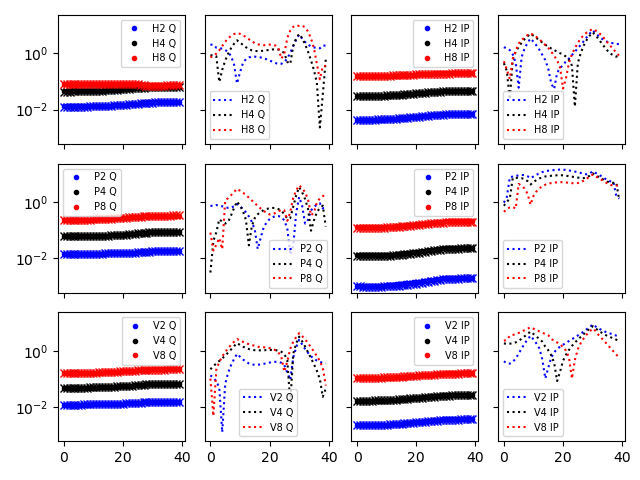

In [435]:
Plot2Datas(data_1D, data_3D)

<Axes: title={'center': 'True Model'}>

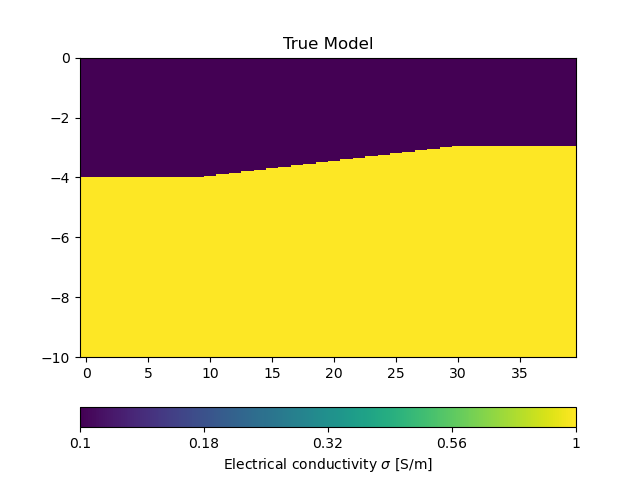

In [48]:
inputs ={'label' : 'Electrical conductivity $\sigma$ [S/m]',
         'cMin': 100/1000,
         'cMax': 1000/1000}

showStitchedModels(models, zMax=10, title = 'True Model', **inputs)

# LCI

In [49]:
LC = LCModelling(FDEM1DModelling)

Inversion is normalized


In [50]:
data_t = data_1D.copy()

In [51]:
LC.initJacobian(dataVals=data_t, nLay=nLayers)
LC.createJacobian(models)
LC.constraint_matrix(data_t, nLay=nLayers)
LC.normalization(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
LC.createWeight(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
LC.createConstraints()


Jacobian size: 702 117 720
cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f0f73761990>


In [52]:
RM = LC.regionManager()
RM.regionIdxs()

2 [1, 2]

# Inversion

In [53]:
# Initial model
m0 = models.copy()

# 3 lay case
m0[:,:1] = 2
m0[:,1:] = 500/1000

m0 = m0.ravel()

# 4 lay case
#m0[:,:3] = 2
#m0[:,3:] = 50/1000

In [54]:
transData = pg.trans.TransLog()
transThk = pg.trans.TransLogLU(1,5)
transSig = pg.trans.TransLogLU(10/1000,2000/1000)

LC.region(1).setTransModel(transThk)
LC.region(2).setTransModel(transSig)

data_true = np.array(data_t).ravel()
relativeError = np.ones_like(data_true)*1e-3 # what is this for?

inv = pg.Inversion(LC)
inv.dataTrans = transData
models_est = inv.run(data_true, relativeError, startModel=m0, verbose=False)

20/04/24 - 10:35:58 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
20/04/24 - 10:35:58 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


In [55]:
models_est = np.array(models_est).reshape(np.shape(models))

models_grid = grid(models)
models_est_grid = grid(models_est)
diff = 100*np.abs(models_grid - models_est_grid)/models_grid

<Axes: title={'center': 'True Model LCI'}>

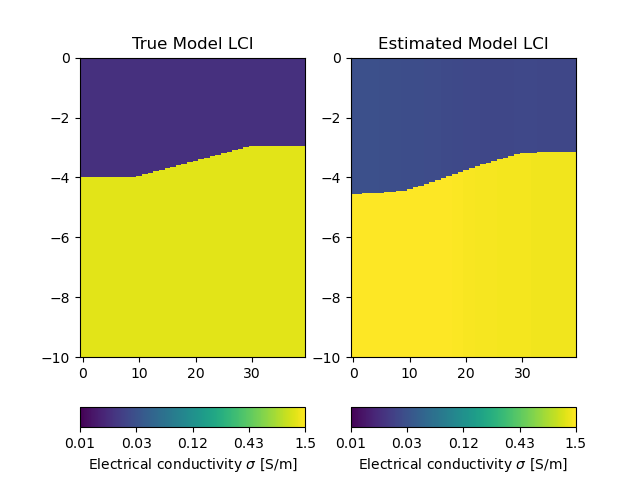

In [56]:


fig, ax = plt.subplots(1,2)

inputs ={'label' : 'Electrical conductivity $\sigma$ [S/m]',
         'cMin': 10/1000,
         'cMax': 1500/1000, 
         'logScale':True, 
         'location':'right'}

showStitchedModels(ax = ax[1], models=models_est, zMax=10, 
                  title = 'Estimated Model LCI', **inputs)

showStitchedModels(ax = ax[0], models=models, zMax=10, 
                  title = 'True Model LCI', **inputs)

#showStitchedModels(ax = ax[2], models=np.abs(models-models_est), zMax=7, 
#                  title = 'True Model LCI', **inputs)
#c = ax[2].imshow(diff.T, extent = [0, 40, -10, 0])
#fig.colorbar(c, ax=ax[2])

Text(0.5, 1.0, '% Relative Difference')

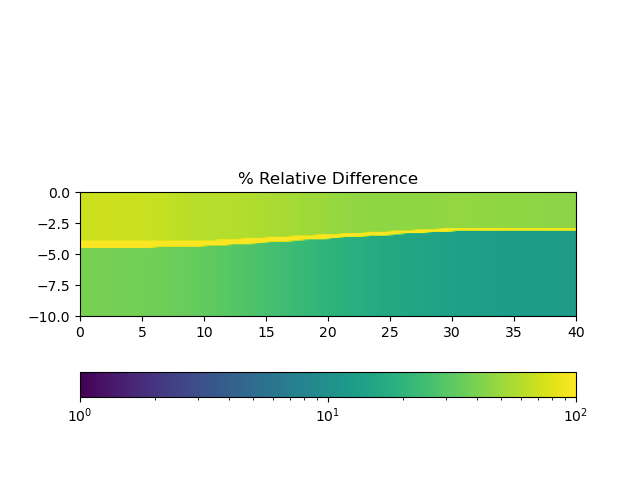

In [58]:
fig, ax = plt.subplots()


c = ax.imshow(diff.T, extent=[0,40, -10,0], norm=colors.LogNorm(vmin=1, vmax=100))
fig.colorbar(c, ax=ax, location='bottom', )
plt.title('% Relative Difference')

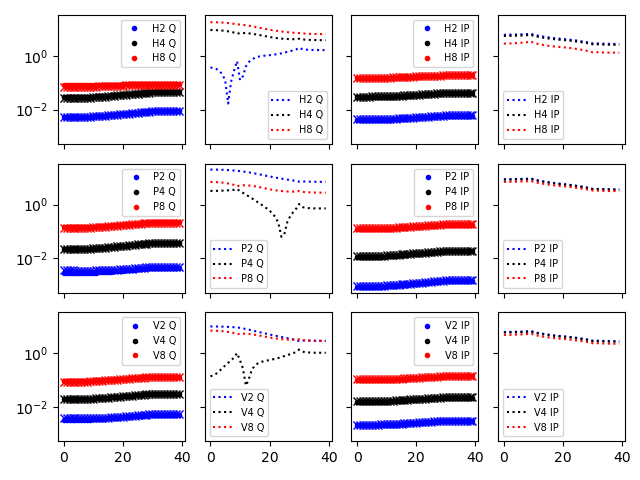

In [59]:
# True data vs Inverted data

data_inv = np.array(inv.response)
data_inv = data_inv.reshape(np.shape(data_t))

Plot2Datas(data_t, data_inv)


### Inversion with L-curve criterion

In [120]:
# Define inversion
#LC.region(1).setConstraintType(10)
#LC.region(2).setConstraintType(10)

# Why is the behaviour so strange ??? when you change the limits

Lcurve = True

chi2 = 1.1
dPhi = 2.1
phi0 = 0
chi2s = []
phis = []
maxIter = 20
ii = 0

print('Started inversion ...')
while Lcurve and (chi2 > 1) and (dPhi > 2) and (ii < maxIter):
    
    
    print('Iteration number: ', ii+1)
    
    #print('Running L-curve criterion')
    lambdas = np.logspace(-1,3,20)
        
    phimodels = []
    phidatas = []
    chis = []
    mods = {}

    for i, a in enumerate(lambdas):
        #print(f'Now using LAMBDA {a} - {i} ITERATION')
        inv = pg.Inversion(LC)
        inv.dataTrans = transData
        mod = inv.run(data_true, relativeError, startModel=m0, verbose=False, lam=a)
        phimodels.append(inv.phiModel())
        phidatas.append(inv.phiData())
        chis.append(inv.chi2())
        mods[a] = mod

    # first derivatives
    dx = np.gradient(phimodels)
    dy = np.gradient(phidatas)

    # second derivatives
    d2x = np.gradient(dx)
    d2y = np.gradient(dy)

    # calculation of curvature
    curvature = np.abs(dx * d2y - d2x * dy)/(dx * dx + dy * dy)**1.5
    print('The optimal alpha =', lambdas[np.argmax(curvature)+1])

    lamb_opt = lambdas[np.argmax(curvature)+1]
    
    inv = pg.Inversion(LC)
    inv.dataTrans = transData
    models_est = inv.run(data_true, relativeError, startModel=m0, 
                         verbose=False, lam=lamb_opt, maxIter=1)
    
    chi2 = inv.chi2()
    chi2s.append(chi2)
    print('Chi2: ', chi2)
    
    phi1 = inv.phi()
    dPhi = np.abs((phi1 - phi0)/phi1)*100
    phis.append(phi1)
    print('dPhi: ', dPhi)

    phi0 = phi1
    m0 = models_est.copy()
    
    ii +=1
    

#plt.figure()
#plt.scatter(phimodels, phidatas, c='g')
#plt.xlabel('Phi Model')
#plt.ylabel('Phi Data')
#plt.title('L-curve analysis')
#for i, txt in enumerate(lambdas):
#    txt = np.round(txt,3)
#    txt = str(txt)
#    plt.annotate(txt, (phimodels[i], phidatas[i]))
#plt.plot(phimodels[np.argmax(curvature)+1], phidatas[np.argmax(curvature)+1], 'b')
#plt.show()


11/04/24 - 13:44:37 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:44:37 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


Started inversion ...
Iteration number:  1


11/04/24 - 13:44:40 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:44:40 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:44:43 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:44:44 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:44:47 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:44:47 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:44:50 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:44:50 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:44:54 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:44:54 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:44:57 - Core - WARNING - no cle

The optimal alpha = 0.26366508987303583


11/04/24 - 13:45:44 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:45:44 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


Chi2:  78181.52887122826
dPhi:  100.0
Iteration number:  2


11/04/24 - 13:45:46 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:45:47 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:45:50 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:45:50 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:45:54 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:45:54 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:45:58 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:45:58 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:46:02 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:46:02 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:46:06 - Core - WARNING - no cle

The optimal alpha = 0.26366508987303583


11/04/24 - 13:46:45 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:46:45 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


Chi2:  9449.1991979445
dPhi:  727.3869881374825
Iteration number:  3


11/04/24 - 13:46:47 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:46:47 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:46:49 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:46:49 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:46:51 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:46:51 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:46:53 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:46:53 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:46:55 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:46:55 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:46:58 - Core - WARNING - no cle

The optimal alpha = 0.26366508987303583


11/04/24 - 13:47:31 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:47:31 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


Chi2:  2392.3337505459435
dPhi:  294.97763599747253
Iteration number:  4


11/04/24 - 13:47:33 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:47:33 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:47:35 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:47:35 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:47:37 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:47:37 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:47:39 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:47:39 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:47:41 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:47:41 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:47:43 - Core - WARNING - no cle

The optimal alpha = 0.26366508987303583


11/04/24 - 13:48:13 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:48:14 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


Chi2:  229.2358367348254
dPhi:  943.5732524093501
Iteration number:  5


11/04/24 - 13:48:15 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:48:16 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:48:17 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:48:17 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:48:20 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:48:20 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:48:22 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:48:22 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:48:24 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
11/04/24 - 13:48:24 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
11/04/24 - 13:48:26 - Core - WARNING - no cle

The optimal alpha = 0.26366508987303583
Chi2:  227.035513193355
dPhi:  0.9690771380417302


In [140]:
#inv = pg.Inversion(LC)
#inv.dataTrans = transData
#models_est = inv.run(data_true, relativeError, startModel=m0.ravel(), verbose=True, lam=lamb_opt)

<Axes: title={'center': 'True Model LCI'}>

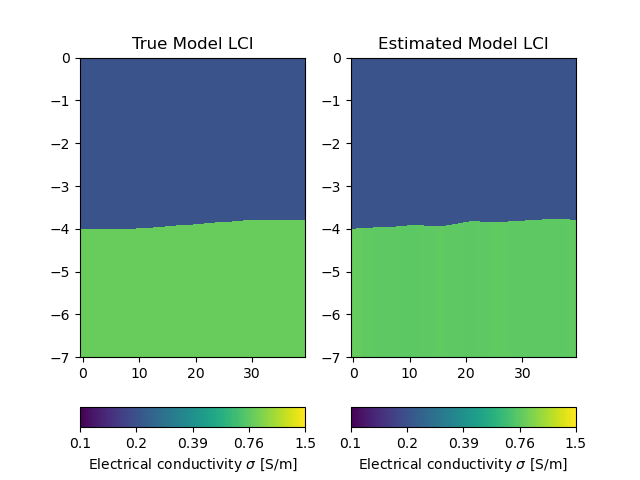

In [121]:
models_est = np.array(models_est).reshape(np.shape(models))

fig, ax = plt.subplots(1,2)

inputs ={'label' : 'Electrical conductivity $\sigma$ [S/m]',
         'cMin': 100/1000,
         'cMax': 1500/1000, 
         'logScale':True}

showStitchedModels(ax = ax[1], models=models_est, zMax=7, 
                  title = 'Estimated Model LCI', **inputs)

showStitchedModels(ax = ax[0], models=models, zMax=7, 
                  title = 'True Model LCI', **inputs)


In [143]:
data_est = inv.fop.response(models_est)

# Reshape data arrays [pos, n_components, n_geometries, n_offsets]
data_true = np.array(data_t).reshape(pos,2,3,3)
data_est = np.array(data_est).reshape(pos,2,3,3)

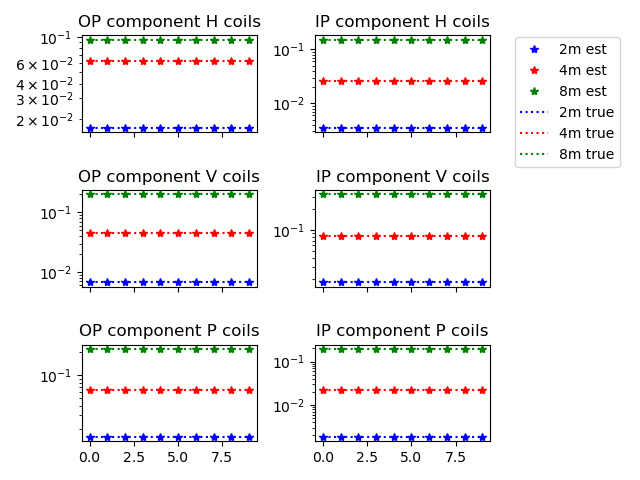

In [144]:
Plot_Datas(data_true, data_est)

## LCI with 3D data

In [83]:
data_3D = np.load('dataLCI_3D.npy').reshape(np.shape(data_t))

In [84]:
data_t = data_3D.copy()

In [85]:
LC = LCModelling(FDEM1DModelling)

Inversion is normalized


In [86]:
LC.initJacobian(dataVals=data_t, nLay=nLayers)
LC.createJacobian(models)
LC.constraint_matrix(data_t, nLay=nLayers)
LC.normalization(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
LC.createWeight(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
LC.createConstraints()


Jacobian size: 162 45 180
cWeights are equal
Constraint cWeight length: 45
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fe336d3c220>


### Inversion 

In [107]:
# Initial model
m0 = models.copy()

# 3 lay case
m0[:,:2] = 2
m0[:,2:] = 500/1000

m0 = m0.ravel()

In [108]:
transData = pg.trans.TransLog()
transThk = pg.trans.TransLogLU(2,5)
transSig = pg.trans.TransLogLU(100/1000,1250/1000)

LC.region(1).setTransModel(transThk)
LC.region(2).setTransModel(transSig)

data_true = np.array(data_t).ravel()
relativeError = np.ones_like(data_true)*1e-3 # what is this for?

inv = pg.Inversion(LC)
inv.dataTrans = transData
models_est = inv.run(data_true, relativeError, startModel=m0, verbose=False)

12/03/24 - 14:51:48 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:51:48 - pyGIMLi - INFO - Starting model set from given array. [2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5
 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.
 2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5]
12/03/24 - 14:51:48 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


<AxesSubplot:title={'center':'True Model LCI'}>

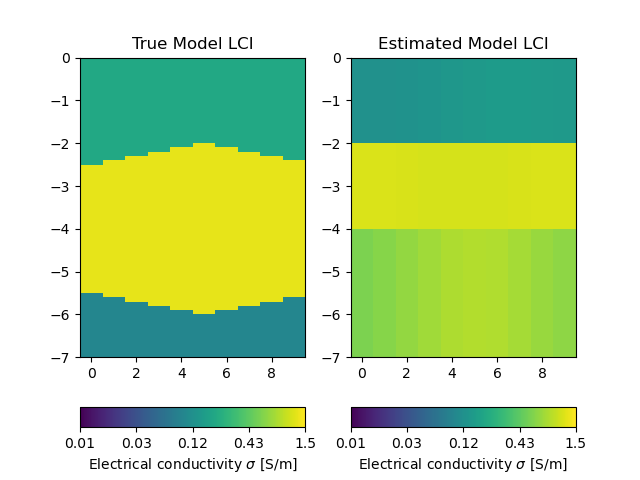

In [109]:
models_est = np.array(models_est).reshape(np.shape(models))

fig, ax = plt.subplots(1,2)

inputs ={'label' : 'Electrical conductivity $\sigma$ [S/m]',
         'cMin': 10/1000,
         'cMax': 1500/1000, 
         'logScale':True}

showStitchedModels(ax = ax[1], models=models_est, zMax=7, 
                  title = 'Estimated Model LCI', **inputs)

showStitchedModels(ax = ax[0], models=models, zMax=7, 
                  title = 'True Model LCI', **inputs)

## Inversion with L-curve criterion

In [110]:
Lcurve = True

LC = LCModelling(FDEM1DModelling)

LC.initJacobian(dataVals=data_t, nLay=nLayers)
LC.createJacobian(models)
LC.constraint_matrix(data_t, nLay=nLayers)
LC.normalization(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
LC.createWeight(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
LC.createConstraints()

transData = pg.trans.TransLog()
transThk = pg.trans.TransLogLU(1,4)
transSig = pg.trans.TransLogLU(100/1000,1250/1000)

LC.region(1).setTransModel(transThk)
LC.region(2).setTransModel(transSig)

data_true = np.array(data_t).ravel()
relativeError = np.ones_like(data_true)*1e-3 # what is this for?

#m0 = models_est.ravel()

chi2 = 1.1
dPhi = 2.1
phi0 = 0
chi2s = []
phis = []
maxIter = 20
ii = 0

print('Started inversion ...')
while Lcurve and (chi2 > 1) and (dPhi > 2) and (ii < maxIter):
    
    
    print('Iteration number: ', ii+1)
    
    #print('Running L-curve criterion')
    lambdas = np.logspace(-1,3,20)
        
    phimodels = []
    phidatas = []
    chis = []
    mods = {}

    for i, a in enumerate(lambdas):
        #print(f'Now using LAMBDA {a} - {i} ITERATION')
        inv = pg.Inversion(LC)
        inv.dataTrans = transData
        mod = inv.run(data_true, relativeError, startModel=m0, verbose=False, lam=a)
        phimodels.append(inv.phiModel())
        phidatas.append(inv.phiData())
        chis.append(inv.chi2())
        mods[a] = mod

    # first derivatives
    dx = np.gradient(phimodels)
    dy = np.gradient(phidatas)

    # second derivatives
    d2x = np.gradient(dx)
    d2y = np.gradient(dy)

    # calculation of curvature
    curvature = np.abs(dx * d2y - d2x * dy)/(dx * dx + dy * dy)**1.5
    print('The optimal alpha =', lambdas[np.argmax(curvature)+1])

    lamb_opt = lambdas[np.argmax(curvature)+1]
    
    inv = pg.Inversion(LC)
    inv.dataTrans = transData
    models_est = inv.run(data_true, relativeError, startModel=m0, 
                         verbose=False, lam=lamb_opt, maxIter=1)
    
    chi2 = inv.chi2()
    chi2s.append(chi2)
    print('Chi2: ', chi2)
    
    phi1 = inv.phi()
    dPhi = np.abs((phi1 - phi0)/phi1)*100
    phis.append(phi1)
    print('dPhi: ', dPhi)

    phi0 = phi1
    m0 = models_est.copy()
    
    ii +=1

Inversion is normalized
Jacobian size: 162 45 180


12/03/24 - 14:52:03 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:52:03 - pyGIMLi - INFO - Starting model set from given array. [2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5
 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.
 2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5]
12/03/24 - 14:52:03 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 45
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fe33155ab80>
Started inversion ...
Iteration number:  1


12/03/24 - 14:52:06 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:52:06 - pyGIMLi - INFO - Starting model set from given array. [2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5
 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.
 2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5]
12/03/24 - 14:52:06 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
12/03/24 - 14:52:08 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:52:08 - pyGIMLi - INFO - Starting model set from given array. [2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5
 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.
 2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5 2.  2.  0.5 0.5 0.5]
12/03/24 - 14:52:08 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
12/03/24 - 14:52:10 - Core - WARNING - no clear() implemente

The optimal alpha = 0.42813323987193935


12/03/24 - 14:52:52 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:52:52 - pyGIMLi - INFO - Starting model set from given array. 50 [2.0, 2.0, 0.19222908138477401, 1.1194765794605486, 0.9170723895024986, 2.0, 2.0, 0.1949118604975253, 1.1092385829604074, 0.9496246254760826, 2.0, 2.0, 0.20085127623770888, 1.0806265729428708, 0.9982843915927342, 2.0, 2.0, 0.20995175985525244, 1.033365158766761, 1.0466923713568985, 2.0, 2.0, 0.22072928409271989, 0.9799747407457181, 1.0780164772626943, 2.0, 2.0, 0.23042697928838204, 0.9414412718359884, 1.0870728042369495, 2.0, 2.0, 0.235319881799548, 0.9475982175645994, 1.0643542172377924, 2.0, 2.0, 0.2336587429789765, 0.9944086661469846, 1.0100766423572596, 2.0, 2.0, 0.2264695548329614, 1.0570080684012846, 0.9309355822768433, 2.0, 2.0, 0.21675121964055297, 1.1089043378451895, 0.850034676263763]
12/03/24 - 14:52:52 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


Chi2:  30285.57786431628
dPhi:  100.0
Iteration number:  2


12/03/24 - 14:52:54 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:52:54 - pyGIMLi - INFO - Starting model set from given array. 50 [2.0, 2.0, 0.19222908138477401, 1.1194765794605486, 0.9170723895024986, 2.0, 2.0, 0.1949118604975253, 1.1092385829604074, 0.9496246254760826, 2.0, 2.0, 0.20085127623770888, 1.0806265729428708, 0.9982843915927342, 2.0, 2.0, 0.20995175985525244, 1.033365158766761, 1.0466923713568985, 2.0, 2.0, 0.22072928409271989, 0.9799747407457181, 1.0780164772626943, 2.0, 2.0, 0.23042697928838204, 0.9414412718359884, 1.0870728042369495, 2.0, 2.0, 0.235319881799548, 0.9475982175645994, 1.0643542172377924, 2.0, 2.0, 0.2336587429789765, 0.9944086661469846, 1.0100766423572596, 2.0, 2.0, 0.2264695548329614, 1.0570080684012846, 0.9309355822768433, 2.0, 2.0, 0.21675121964055297, 1.1089043378451895, 0.850034676263763]
12/03/24 - 14:52:54 - Core - ERROR - no cWeights defined. You should create constraints matrix first.
12/03/24 - 14:52:56 - Core

The optimal alpha = 1.8329807108324356


12/03/24 - 14:53:35 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:53:35 - pyGIMLi - INFO - Starting model set from given array. 50 [1.942821255416445, 2.8649404996378864, 0.17643519108722291, 1.0150202148848144, 0.8288192836688378, 1.91936325212979, 2.852757987175798, 0.1775085792086216, 0.997632574645886, 0.8785531300116273, 1.8763149619414274, 2.836125981353157, 0.18079042941756454, 0.9567940469191718, 0.9578082451652573, 1.8217581715353939, 2.8236945847394552, 0.18681297696061763, 0.9013537511958188, 1.0387500517574482, 1.7728707429969073, 2.808727560428404, 0.195104817350125, 0.8494738250637268, 1.0919260552323309, 1.7491742783876671, 2.790093837758448, 0.20376270337807592, 0.8202473386122864, 1.109734868487296, 1.7640558371061574, 2.7733254731604657, 0.20925667824350755, 0.8321767093423197, 1.0846582516578163, 1.8088603192170298, 2.7579440803369217, 0.20963286879500861, 0.8807777258834683, 1.0137334739036619, 1.8628078617834702, 2.7421349163098

Chi2:  16626.913670391114
dPhi:  81.8292760658378
Iteration number:  3


12/03/24 - 14:53:37 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:53:37 - pyGIMLi - INFO - Starting model set from given array. 50 [1.942821255416445, 2.8649404996378864, 0.17643519108722291, 1.0150202148848144, 0.8288192836688378, 1.91936325212979, 2.852757987175798, 0.1775085792086216, 0.997632574645886, 0.8785531300116273, 1.8763149619414274, 2.836125981353157, 0.18079042941756454, 0.9567940469191718, 0.9578082451652573, 1.8217581715353939, 2.8236945847394552, 0.18681297696061763, 0.9013537511958188, 1.0387500517574482, 1.7728707429969073, 2.808727560428404, 0.195104817350125, 0.8494738250637268, 1.0919260552323309, 1.7491742783876671, 2.790093837758448, 0.20376270337807592, 0.8202473386122864, 1.109734868487296, 1.7640558371061574, 2.7733254731604657, 0.20925667824350755, 0.8321767093423197, 1.0846582516578163, 1.8088603192170298, 2.7579440803369217, 0.20963286879500861, 0.8807777258834683, 1.0137334739036619, 1.8628078617834702, 2.7421349163098

The optimal alpha = 1.8329807108324356


12/03/24 - 14:54:12 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:54:12 - pyGIMLi - INFO - Starting model set from given array. 50 [2.001441238883919, 3.939999925132781, 0.137370438851571, 1.0074001402293387, 0.32790706784434365, 1.8889849112147836, 3.9383642987947853, 0.13445780030688745, 0.9722839416743385, 0.4212114156389222, 1.716502720575304, 3.9361342790266267, 0.13148273333146768, 0.9094356290265064, 0.6381721880315323, 1.5407383787210147, 3.9337628092851826, 0.130183024883682, 0.8466376165735244, 0.9297544971969128, 1.418853262621845, 3.929106026639931, 0.13167118767426222, 0.8102615483329504, 1.1085357817613084, 1.3685762270970754, 3.9225959490573814, 0.13581738271680424, 0.7982721472551375, 1.1605337684738337, 1.3981951096509873, 3.920634143967496, 0.14118631533030582, 0.8059217976414034, 1.132729319658631, 1.4969112193319372, 3.91882766572381, 0.14592924975734892, 0.8327052376015344, 0.9906191411491013, 1.6239563959087642, 3.9133517039873

Chi2:  6810.216545602304
dPhi:  139.4353797184565
Iteration number:  4


12/03/24 - 14:54:13 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:54:13 - pyGIMLi - INFO - Starting model set from given array. 50 [2.001441238883919, 3.939999925132781, 0.137370438851571, 1.0074001402293387, 0.32790706784434365, 1.8889849112147836, 3.9383642987947853, 0.13445780030688745, 0.9722839416743385, 0.4212114156389222, 1.716502720575304, 3.9361342790266267, 0.13148273333146768, 0.9094356290265064, 0.6381721880315323, 1.5407383787210147, 3.9337628092851826, 0.130183024883682, 0.8466376165735244, 0.9297544971969128, 1.418853262621845, 3.929106026639931, 0.13167118767426222, 0.8102615483329504, 1.1085357817613084, 1.3685762270970754, 3.9225959490573814, 0.13581738271680424, 0.7982721472551375, 1.1605337684738337, 1.3981951096509873, 3.920634143967496, 0.14118631533030582, 0.8059217976414034, 1.132729319658631, 1.4969112193319372, 3.91882766572381, 0.14592924975734892, 0.8327052376015344, 0.9906191411491013, 1.6239563959087642, 3.9133517039873

The optimal alpha = 7.847599703514611


12/03/24 - 14:54:43 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:54:43 - pyGIMLi - INFO - Starting model set from given array. 50 [1.9992727710739453, 3.1359845020419153, 0.13443008625364383, 1.0142808498781124, 0.3430944761093327, 1.9004494086052823, 3.1224095362444295, 0.13193801033769717, 0.9820947117348591, 0.4304083092726521, 1.7438305795609985, 3.1041449177814155, 0.1294008371720395, 0.920989816086104, 0.6269745173544359, 1.5751940537932902, 3.085183086305462, 0.12829877153351305, 0.8548961811837978, 0.8896504558336337, 1.45105604607329, 3.0491056723404086, 0.12959685089579387, 0.8120207939182562, 1.0642902787071553, 1.3958019532856452, 3.0011793093992964, 0.13323816022540427, 0.7958781192749694, 1.12209595259185, 1.4193637259657035, 2.9870822899873146, 0.1380268537625954, 0.8038498694155265, 1.0921976928192325, 1.5121564088514092, 2.974171512052857, 0.14229105242705933, 0.8353558094256142, 0.9530892904771454, 1.6347428344599708, 2.9367391766

Chi2:  6741.809556657806
dPhi:  3.7561170412991194
Iteration number:  5


12/03/24 - 14:54:46 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:54:46 - pyGIMLi - INFO - Starting model set from given array. 50 [1.9992727710739453, 3.1359845020419153, 0.13443008625364383, 1.0142808498781124, 0.3430944761093327, 1.9004494086052823, 3.1224095362444295, 0.13193801033769717, 0.9820947117348591, 0.4304083092726521, 1.7438305795609985, 3.1041449177814155, 0.1294008371720395, 0.920989816086104, 0.6269745173544359, 1.5751940537932902, 3.085183086305462, 0.12829877153351305, 0.8548961811837978, 0.8896504558336337, 1.45105604607329, 3.0491056723404086, 0.12959685089579387, 0.8120207939182562, 1.0642902787071553, 1.3958019532856452, 3.0011793093992964, 0.13323816022540427, 0.7958781192749694, 1.12209595259185, 1.4193637259657035, 2.9870822899873146, 0.1380268537625954, 0.8038498694155265, 1.0921976928192325, 1.5121564088514092, 2.974171512052857, 0.14229105242705933, 0.8353558094256142, 0.9530892904771454, 1.6347428344599708, 2.9367391766

The optimal alpha = 1.1288378916846888


12/03/24 - 14:55:16 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:55:16 - pyGIMLi - INFO - Starting model set from given array. 50 [1.9836831367976797, 3.6860917344990503, 0.13344296825019297, 0.9672116163294918, 0.2699610842243192, 1.8944627384252122, 3.6799022534055665, 0.13027757341710602, 0.9463265408575516, 0.36250390574315766, 1.753943534812353, 3.6671803194888484, 0.12632239649697857, 0.9066583271230494, 0.5776210105519108, 1.6108680351329714, 3.6566636132635257, 0.12369326991390453, 0.8667973281780188, 0.8731260157510299, 1.5079243836282268, 3.6383862399558273, 0.1237286169034482, 0.8417651898547953, 1.0788541787422703, 1.4571818552432982, 3.6019791288640746, 0.12644420423851427, 0.8318043919305335, 1.1440087506754422, 1.4701588284912577, 3.5812472056076925, 0.1314071156871868, 0.8339573393837366, 1.1116129282886538, 1.5452585196184325, 3.5495069164901722, 0.1370876938624219, 0.852188257422265, 0.9516885396523922, 1.653666948219093, 3.493730

Chi2:  5673.07242520633
dPhi:  25.497445254380352
Iteration number:  6


12/03/24 - 14:55:17 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:55:17 - pyGIMLi - INFO - Starting model set from given array. 50 [1.9836831367976797, 3.6860917344990503, 0.13344296825019297, 0.9672116163294918, 0.2699610842243192, 1.8944627384252122, 3.6799022534055665, 0.13027757341710602, 0.9463265408575516, 0.36250390574315766, 1.753943534812353, 3.6671803194888484, 0.12632239649697857, 0.9066583271230494, 0.5776210105519108, 1.6108680351329714, 3.6566636132635257, 0.12369326991390453, 0.8667973281780188, 0.8731260157510299, 1.5079243836282268, 3.6383862399558273, 0.1237286169034482, 0.8417651898547953, 1.0788541787422703, 1.4571818552432982, 3.6019791288640746, 0.12644420423851427, 0.8318043919305335, 1.1440087506754422, 1.4701588284912577, 3.5812472056076925, 0.1314071156871868, 0.8339573393837366, 1.1116129282886538, 1.5452585196184325, 3.5495069164901722, 0.1370876938624219, 0.852188257422265, 0.9516885396523922, 1.653666948219093, 3.493730

The optimal alpha = 0.42813323987193935


12/03/24 - 14:55:42 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:55:42 - pyGIMLi - INFO - Starting model set from given array. 50 [2.055862372155241, 3.996921998373586, 0.13429934256394205, 0.9834425632883347, 0.14287058376530365, 1.9688267066084872, 3.9967565525659685, 0.12911754032239653, 0.9628073967454377, 0.21809097091247345, 1.8003959601773616, 3.9962592427327275, 0.12010588466326681, 0.9133316971702883, 0.4549778199481741, 1.6216347703682599, 3.99576104219537, 0.11261681800535564, 0.8606250633608391, 0.8267523830826236, 1.4915109551756949, 3.99523878952569, 0.10971879415304298, 0.8222794743834224, 1.1222606544979974, 1.4315230231749347, 3.9937625085458732, 0.11058568894042356, 0.8103998822922507, 1.2015398354614308, 1.4448464449944407, 3.9920509970799944, 0.11536070907569282, 0.8143713763455672, 1.1707864587028143, 1.544975663295868, 3.988281804431388, 0.1245297745559667, 0.8463991998821102, 0.9546426151227282, 1.692074241865315, 3.981189858

Chi2:  4723.917720239015
dPhi:  19.9167134574561
Iteration number:  7


12/03/24 - 14:55:43 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:55:43 - pyGIMLi - INFO - Starting model set from given array. 50 [2.055862372155241, 3.996921998373586, 0.13429934256394205, 0.9834425632883347, 0.14287058376530365, 1.9688267066084872, 3.9967565525659685, 0.12911754032239653, 0.9628073967454377, 0.21809097091247345, 1.8003959601773616, 3.9962592427327275, 0.12010588466326681, 0.9133316971702883, 0.4549778199481741, 1.6216347703682599, 3.99576104219537, 0.11261681800535564, 0.8606250633608391, 0.8267523830826236, 1.4915109551756949, 3.99523878952569, 0.10971879415304298, 0.8222794743834224, 1.1222606544979974, 1.4315230231749347, 3.9937625085458732, 0.11058568894042356, 0.8103998822922507, 1.2015398354614308, 1.4448464449944407, 3.9920509970799944, 0.11536070907569282, 0.8143713763455672, 1.1707864587028143, 1.544975663295868, 3.988281804431388, 0.1245297745559667, 0.8463991998821102, 0.9546426151227282, 1.692074241865315, 3.981189858

The optimal alpha = 0.42813323987193935


12/03/24 - 14:56:18 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:56:18 - pyGIMLi - INFO - Starting model set from given array. 50 [2.083218808309936, 3.9932086088681227, 0.132175967689476, 1.037469113164698, 0.2159835471513773, 2.0071593212432712, 3.9932208521124424, 0.12805752688288338, 1.0145135845134836, 0.28757615982639684, 1.8325031221183357, 3.993183340109731, 0.11930423119990731, 0.9468186056901113, 0.5048048392505365, 1.6368989154409186, 3.9931348899408046, 0.11116983855860194, 0.8649837213913704, 0.8056785006294153, 1.497247048440685, 3.9930668712983812, 0.10790760228863998, 0.8069658743494844, 1.0150313328491785, 1.421601144623274, 3.992969510682522, 0.10795435194623704, 0.7807256229757537, 1.080398567274646, 1.4216971927047402, 3.992846309956034, 0.1116266280273969, 0.7861955837903081, 1.0625034681257057, 1.5262396347663967, 3.9926879950815133, 0.1213021959680587, 0.8336872425416568, 0.9183616613168656, 1.711690995455612, 3.9924793333395

Chi2:  3915.595815833407
dPhi:  21.308559131792595
Iteration number:  8


12/03/24 - 14:56:19 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:56:19 - pyGIMLi - INFO - Starting model set from given array. 50 [2.083218808309936, 3.9932086088681227, 0.132175967689476, 1.037469113164698, 0.2159835471513773, 2.0071593212432712, 3.9932208521124424, 0.12805752688288338, 1.0145135845134836, 0.28757615982639684, 1.8325031221183357, 3.993183340109731, 0.11930423119990731, 0.9468186056901113, 0.5048048392505365, 1.6368989154409186, 3.9931348899408046, 0.11116983855860194, 0.8649837213913704, 0.8056785006294153, 1.497247048440685, 3.9930668712983812, 0.10790760228863998, 0.8069658743494844, 1.0150313328491785, 1.421601144623274, 3.992969510682522, 0.10795435194623704, 0.7807256229757537, 1.080398567274646, 1.4216971927047402, 3.992846309956034, 0.1116266280273969, 0.7861955837903081, 1.0625034681257057, 1.5262396347663967, 3.9926879950815133, 0.1213021959680587, 0.8336872425416568, 0.9183616613168656, 1.711690995455612, 3.9924793333395

The optimal alpha = 4.832930238571752


12/03/24 - 14:56:51 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:56:51 - pyGIMLi - INFO - Starting model set from given array. 50 [2.062899936028233, 1.0, 0.12813739467370291, 1.0613252233617763, 0.35238581040329636, 1.994163179856449, 1.0, 0.12532207468105136, 1.034610082925658, 0.42189148014305383, 1.854375111337268, 1.0, 0.12058506485035717, 0.9661981971550064, 0.5825751125334014, 1.6791145326299814, 1.0, 0.1160805652817564, 0.8807769485223879, 0.7937546226340455, 1.5346151673912187, 1.0, 0.1140572057819905, 0.8148465654671774, 0.9496808466547558, 1.4559149288782005, 1.0, 0.11454634636730993, 0.784983649154588, 1.0083879791313863, 1.4572973895093677, 1.0, 0.1178796023959075, 0.7908066522589012, 0.9909676590928281, 1.5515631053223842, 1.0, 0.12431068606992027, 0.840546282119873, 0.8818576827849792, 1.700803535991201, 1.0, 0.1307616769868991, 0.925959654273856, 0.6803896126213093, 1.8178931066656125, 1.0, 0.13268820854580568, 1.0005147750005368, 0

Chi2:  35443.95695311012
dPhi:  88.89823612886832
Iteration number:  9


12/03/24 - 14:56:55 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:56:55 - pyGIMLi - INFO - Starting model set from given array. 50 [2.062899936028233, 1.0, 0.12813739467370291, 1.0613252233617763, 0.35238581040329636, 1.994163179856449, 1.0, 0.12532207468105136, 1.034610082925658, 0.42189148014305383, 1.854375111337268, 1.0, 0.12058506485035717, 0.9661981971550064, 0.5825751125334014, 1.6791145326299814, 1.0, 0.1160805652817564, 0.8807769485223879, 0.7937546226340455, 1.5346151673912187, 1.0, 0.1140572057819905, 0.8148465654671774, 0.9496808466547558, 1.4559149288782005, 1.0, 0.11454634636730993, 0.784983649154588, 1.0083879791313863, 1.4572973895093677, 1.0, 0.1178796023959075, 0.7908066522589012, 0.9909676590928281, 1.5515631053223842, 1.0, 0.12431068606992027, 0.840546282119873, 0.8818576827849792, 1.700803535991201, 1.0, 0.1307616769868991, 0.925959654273856, 0.6803896126213093, 1.8178931066656125, 1.0, 0.13268820854580568, 1.0005147750005368, 0

The optimal alpha = 1.8329807108324356


12/03/24 - 14:57:37 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:57:37 - pyGIMLi - INFO - Starting model set from given array. 50 [2.1213123062478254, 1.0000000100000013, 0.13148670354997352, 1.1913103515136578, 0.7062082253630444, 2.0778372823947406, 1.000000010000001, 0.1279683114068442, 1.1768832879887583, 0.7086256927812553, 2.018094060229202, 1.000000010000001, 0.12439929471078881, 1.1431557961513565, 0.7423325068431684, 1.918456738391509, 1.000000010000001, 0.1248145139671825, 1.0716625535402737, 0.8119264248621566, 1.785730557923201, 1.000000010000001, 0.1316986332810384, 0.9502915844667271, 0.8728205782602005, 1.7053774929926462, 1.000000010000001, 0.14137065532746065, 0.8646053333487816, 0.9057206299978381, 1.7403727516733523, 1.0000000100000008, 0.14589333262565518, 0.9023393025189581, 0.8922892453486672, 1.8598192188444207, 1.0000000100000008, 0.14217063382816145, 1.0325111594869312, 0.8376597840032012, 1.948867966174943, 1.0000000100000

Chi2:  6518.492344757573
dPhi:  442.04428798668107
Iteration number:  10


12/03/24 - 14:57:40 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:57:40 - pyGIMLi - INFO - Starting model set from given array. 50 [2.1213123062478254, 1.0000000100000013, 0.13148670354997352, 1.1913103515136578, 0.7062082253630444, 2.0778372823947406, 1.000000010000001, 0.1279683114068442, 1.1768832879887583, 0.7086256927812553, 2.018094060229202, 1.000000010000001, 0.12439929471078881, 1.1431557961513565, 0.7423325068431684, 1.918456738391509, 1.000000010000001, 0.1248145139671825, 1.0716625535402737, 0.8119264248621566, 1.785730557923201, 1.000000010000001, 0.1316986332810384, 0.9502915844667271, 0.8728205782602005, 1.7053774929926462, 1.000000010000001, 0.14137065532746065, 0.8646053333487816, 0.9057206299978381, 1.7403727516733523, 1.0000000100000008, 0.14589333262565518, 0.9023393025189581, 0.8922892453486672, 1.8598192188444207, 1.0000000100000008, 0.14217063382816145, 1.0325111594869312, 0.8376597840032012, 1.948867966174943, 1.0000000100000

The optimal alpha = 143.8449888287663


12/03/24 - 14:58:12 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:58:12 - pyGIMLi - INFO - Starting model set from given array. 50 [1.8924108500726098, 1.0000000100000013, 0.12074821541603158, 1.0796263822515846, 0.7456939261003535, 1.878514170575561, 1.0000000100000013, 0.12107549875921267, 1.0793890914027635, 0.7600986176103446, 1.8555579683878052, 1.0000000100000013, 0.12175741511933018, 1.0787229762373634, 0.7810500843277844, 1.8282905841169923, 1.0000000100000013, 0.12276018828913735, 1.0775477345489461, 0.802090070460697, 1.8128168107449736, 1.0000000100000013, 0.12394459354602118, 1.0753425566044652, 0.8148209312234971, 1.798900494204661, 1.0000000100000013, 0.12523285727330194, 1.0734211246565033, 0.8184841398248621, 1.7677987831700823, 1.0000000100000013, 0.12655803946100408, 1.0749165356264885, 0.8168721760566524, 1.7430031195267068, 1.0000000100000013, 0.12735088283763732, 1.0771999625404114, 0.8073188229506403, 1.7486547565247934, 1.0000

Chi2:  4956.862349999613
dPhi:  30.560532709861043
Iteration number:  11


12/03/24 - 14:58:14 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:58:14 - pyGIMLi - INFO - Starting model set from given array. 50 [1.8924108500726098, 1.0000000100000013, 0.12074821541603158, 1.0796263822515846, 0.7456939261003535, 1.878514170575561, 1.0000000100000013, 0.12107549875921267, 1.0793890914027635, 0.7600986176103446, 1.8555579683878052, 1.0000000100000013, 0.12175741511933018, 1.0787229762373634, 0.7810500843277844, 1.8282905841169923, 1.0000000100000013, 0.12276018828913735, 1.0775477345489461, 0.802090070460697, 1.8128168107449736, 1.0000000100000013, 0.12394459354602118, 1.0753425566044652, 0.8148209312234971, 1.798900494204661, 1.0000000100000013, 0.12523285727330194, 1.0734211246565033, 0.8184841398248621, 1.7677987831700823, 1.0000000100000013, 0.12655803946100408, 1.0749165356264885, 0.8168721760566524, 1.7430031195267068, 1.0000000100000013, 0.12735088283763732, 1.0771999625404114, 0.8073188229506403, 1.7486547565247934, 1.0000

The optimal alpha = 1.8329807108324356


12/03/24 - 14:58:47 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:58:47 - pyGIMLi - INFO - Starting model set from given array. 50 [1.953088048703225, 1.0000000100000015, 0.12114676621353827, 1.148217461721348, 0.7267371961938827, 1.9310794574339445, 1.0000000100000015, 0.12132302334199811, 1.1407730205340694, 0.7442694720652359, 1.8953065117848649, 1.0000000100000015, 0.12192831288855992, 1.1262112287264074, 0.7702668089005874, 1.8543242485221398, 1.0000000100000013, 0.12306802245035803, 1.1067416256340943, 0.7977767585872091, 1.826482733854663, 1.0000000100000013, 0.12462851527032401, 1.0871299730544792, 0.8169103235414857, 1.8065393378593635, 1.0000000100000013, 0.12642425926928488, 1.0751495223798977, 0.8244756135505282, 1.7790202922514657, 1.0000000100000013, 0.12811174274093964, 1.0782920113036196, 0.8216422442000995, 1.7629787573566487, 1.0000000100000013, 0.12890723027765494, 1.0921025889660336, 0.8069493669988712, 1.7754883805269455, 1.0000

Chi2:  4899.752730979622
dPhi:  2.7811542862970238
Iteration number:  12


12/03/24 - 14:58:49 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
12/03/24 - 14:58:49 - pyGIMLi - INFO - Starting model set from given array. 50 [1.953088048703225, 1.0000000100000015, 0.12114676621353827, 1.148217461721348, 0.7267371961938827, 1.9310794574339445, 1.0000000100000015, 0.12132302334199811, 1.1407730205340694, 0.7442694720652359, 1.8953065117848649, 1.0000000100000015, 0.12192831288855992, 1.1262112287264074, 0.7702668089005874, 1.8543242485221398, 1.0000000100000013, 0.12306802245035803, 1.1067416256340943, 0.7977767585872091, 1.826482733854663, 1.0000000100000013, 0.12462851527032401, 1.0871299730544792, 0.8169103235414857, 1.8065393378593635, 1.0000000100000013, 0.12642425926928488, 1.0751495223798977, 0.8244756135505282, 1.7790202922514657, 1.0000000100000013, 0.12811174274093964, 1.0782920113036196, 0.8216422442000995, 1.7629787573566487, 1.0000000100000013, 0.12890723027765494, 1.0921025889660336, 0.8069493669988712, 1.7754883805269455, 1.0000

The optimal alpha = 1.8329807108324356
Chi2:  4839.735550595085
dPhi:  1.0648094037887357


<AxesSubplot:title={'center':'True Model LCI'}>

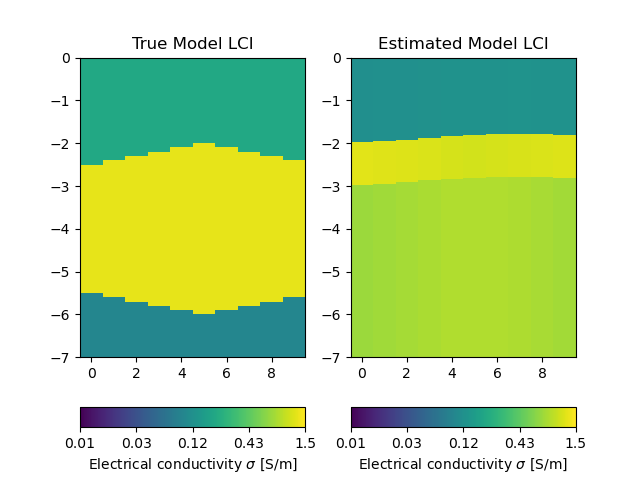

In [111]:
models_est = np.array(models_est).reshape(np.shape(models))

fig, ax = plt.subplots(1,2)

inputs ={'label' : 'Electrical conductivity $\sigma$ [S/m]',
         'cMin': 10/1000,
         'cMax': 1500/1000, 
         'logScale':True}

showStitchedModels(ax = ax[1], models=models_est, zMax=7, 
                  title = 'Estimated Model LCI', **inputs)

showStitchedModels(ax = ax[0], models=models, zMax=7, 
                  title = 'True Model LCI', **inputs)


In [112]:
data_est = inv.fop.response(models_est)

# Reshape data arrays [pos, n_components, n_geometries, n_offsets]
data_true = np.array(data_t).reshape(pos,2,3,3)
data_est = np.array(data_est).reshape(pos,2,3,3)

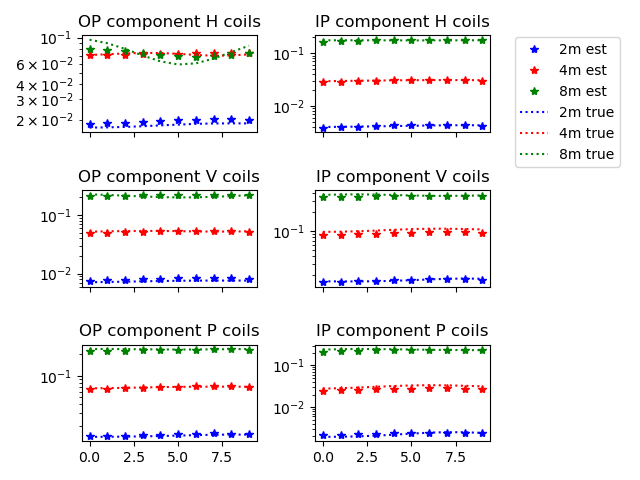

In [113]:
Plot_Datas(data_true, data_est)

## Sort 3D Data

In [9]:
xsrc = np.linspace(-4, 13, 18, endpoint=True)

OUT = pd.DataFrame({})

for p in range(18):
    print('Position:', p)
    print('Defining geometry')
    # Define source coordinates
    src_x = xsrc[p]
    Hsrc_coords = [src_x, 0, 0, 0, 90]
    Vsrc_coords = [src_x, 0, 0, 90, 0]
    print('source:', Hsrc_coords)
    
    # Define H and V receivers coordinates
    offsets_HV = np.array([xsrc[p]+2, xsrc[p]+4, xsrc[p]+8])
    offsets_P = np.array([xsrc[p]+2.1, xsrc[p]+4.1, xsrc[p]+8.1])
    
    OUT_i = pd.DataFrame({'geom'  : ['H2', 'H4', 'H8', 'V2', 'V4', 'V8', 'P2', 'P4', 'P8'],
                          'src_x' : [Hsrc_coords[0], Hsrc_coords[0], Hsrc_coords[0],
                                     Vsrc_coords[0], Vsrc_coords[0], Vsrc_coords[0],
                                     Hsrc_coords[0], Hsrc_coords[0], Hsrc_coords[0]],
                          'rec_x' : np.hstack((offsets_HV, offsets_HV, offsets_P)),
                          'midpx' : np.hstack((Hsrc_coords[0] + (offsets_HV - Hsrc_coords[0])/2,
                                               Vsrc_coords[0] + (offsets_HV - Vsrc_coords[0])/2,
                                               Hsrc_coords[0] + (offsets_P - Hsrc_coords[0])/2)),
                          'op'    : np.random.randn(9),
                          'ip'    : np.random.randn(9) 
                          })
    
    OUT = pd.concat([OUT, OUT_i], ignore_index=True)

Position: 0
Defining geometry
source: [-4.0, 0, 0, 0, 90]
Position: 1
Defining geometry
source: [-3.0, 0, 0, 0, 90]
Position: 2
Defining geometry
source: [-2.0, 0, 0, 0, 90]
Position: 3
Defining geometry
source: [-1.0, 0, 0, 0, 90]
Position: 4
Defining geometry
source: [0.0, 0, 0, 0, 90]
Position: 5
Defining geometry
source: [1.0, 0, 0, 0, 90]
Position: 6
Defining geometry
source: [2.0, 0, 0, 0, 90]
Position: 7
Defining geometry
source: [3.0, 0, 0, 0, 90]
Position: 8
Defining geometry
source: [4.0, 0, 0, 0, 90]
Position: 9
Defining geometry
source: [5.0, 0, 0, 0, 90]
Position: 10
Defining geometry
source: [6.0, 0, 0, 0, 90]
Position: 11
Defining geometry
source: [7.0, 0, 0, 0, 90]
Position: 12
Defining geometry
source: [8.0, 0, 0, 0, 90]
Position: 13
Defining geometry
source: [9.0, 0, 0, 0, 90]
Position: 14
Defining geometry
source: [10.0, 0, 0, 0, 90]
Position: 15
Defining geometry
source: [11.0, 0, 0, 0, 90]
Position: 16
Defining geometry
source: [12.0, 0, 0, 0, 90]
Position: 17
Defi

In [28]:
OUT_sort_cut = OUT.sort_values(by='midpx')[15:-12]

In [43]:
op = np.array(OUT_sort_cut.iloc[:9,:].sort_values(by='geom')['op'])
op

array([ 0.37406406,  0.19464398,  0.85450219,  0.42122742, -1.08387876,
       -0.43950575, -0.04730315, -0.88017779,  0.56076093])